## Download dataset

In [28]:
# prompt: download this "https://drive.google.com/file/d/1iWaDuDQKftRDZ_poWyEua7j6_leDhDQc/view?usp=sharing"

# !gdown --id 1iWaDuDQKftRDZ_poWyEua7j6_leDhDQc 
# dataset is already in box_train (download this manually from the given link)


In [29]:
# prompt: # unzip "box_train.zip"

# !unzip box_train.zip

In [30]:
dataset_path = "box_train"

____

In [31]:
import cv2 #import computer vision lib
import numpy as np #import numpy as np
import torch #import pytorch
import matplotlib.pyplot as plt
import torch
import torchvision
import sys, os



HOME = os.getcwd()  #get the current work directory using the getcwd(), and assign it to home var
print("HOME:", HOME)



print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())


HOME: e:\Projects Archive\3_EDR-bin picking\SAM Model
PyTorch version: 2.2.1+cpu
Torchvision version: 0.17.1+cpu
CUDA is available: False


## Install FastSAM Github repository

In [32]:
!pip install segment-anything-fast

## Download FastSAM Weights

### Download the checkpoints

Two model versions of the model are available with different sizes.
- `default` or `FastSAM` - [https://drive.google.com/file/d/1m1sjY4ihXBU1fZXdQ-Xdj-mDltW-2Rqv/view](https://drive.google.com/file/d/1m1sjY4ihXBU1fZXdQ-Xdj-mDltW-2Rqv/view)
- `FastSAM-s` - [https://drive.google.com/file/d/10XmSj6mmpmRb8NhXbtiuO9cTTBwR_9SV/view](https://drive.google.com/file/d/10XmSj6mmpmRb8NhXbtiuO9cTTBwR_9SV/view)

In [33]:
# Download weights for 'default' checkpoint
# !gdown --id 1m1sjY4ihXBU1fZXdQ-Xdj-mDltW-2Rqv

# Download these checkpoints manually

In [34]:
# Download weights for 'FastSAM-s' checkpoint
# !gdown --id 10XmSj6mmpmRb8NhXbtiuO9cTTBwR_9SV


# Download these checkpoints manually

In [35]:
# TODO: Write a function to download file in google drive without using gdown

___

## Setup

In [36]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [37]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))


## Example image

## Using pretrained model

In [38]:
fast_sam_checkpoint = "/content/FastSAM-x.pt"
fast_sam_s_checkpoint = "/content/FastSAM-s.pt"

In [39]:
# prompt: device = "cuda" or cpu

device = "cpu"

In [40]:
from fastsam import FastSAM, FastSAMPrompt

model_fast_sam = FastSAM(fast_sam_checkpoint)
model_fast_sam_s = FastSAM(fast_sam_s_checkpoint)

## Example image

In [41]:
def list_image_files(directory):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # Add more if needed
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_files.append(os.path.join(root, file))
    return image_files

image_paths = list_image_files(dataset_path)

In [64]:
# import random


# # Generate a random index between 1 and the length of the list
# random_index = random.randint(1, len(image_paths))

# # Retrieve the value at the randomly generated index
# random_value = image_paths[random_index - 1]

# print("Random index from the list:", random_index)
random_index = 42
random_index = 17
# random_index = 104

sample_img_path = image_paths[random_index - 1]

In [62]:
image = cv2.imread(sample_img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

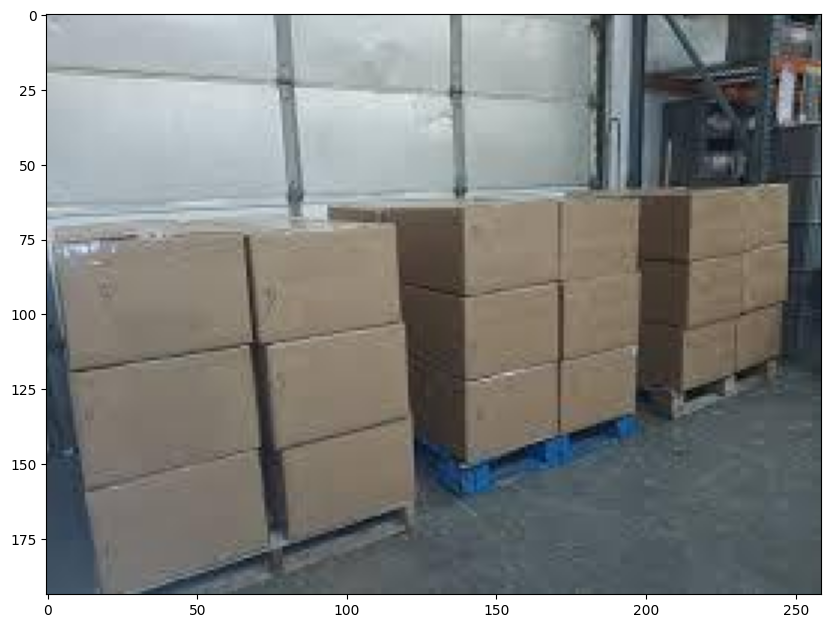

In [63]:
def plot_image(image):
  plt.figure(figsize=(10,10))
  plt.imshow(image)
  plt.axis('on')
  plt.show()

plot_image(image)

In [46]:
# prompt: get image resolution

image_height, image_width, _ = image.shape
print(f"Image resolution: {image_width}x{image_height}")


Image resolution: 1087x793


In [47]:
center_point_coords = [ int(image_width/2), int(image_height/2)]

In [48]:
input_point = np.array([center_point_coords])
input_label = np.array([1])

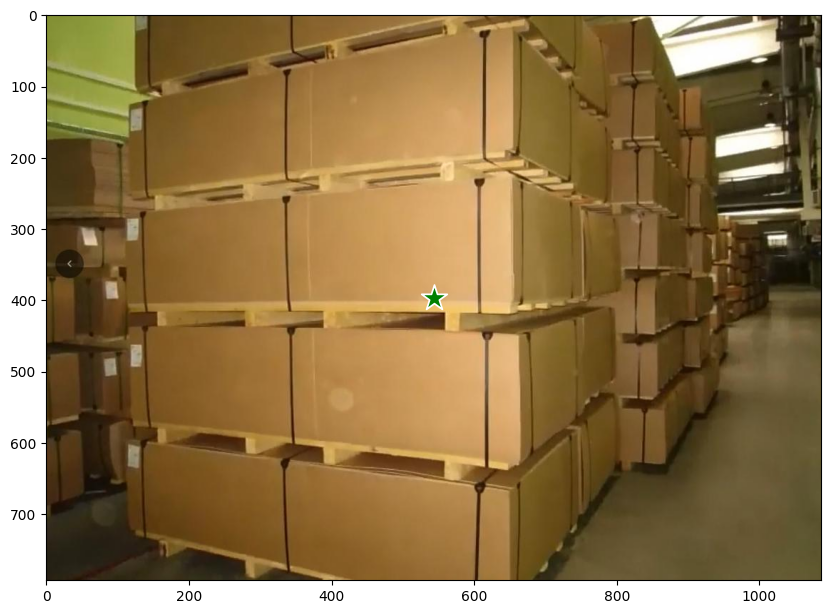

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

### Mask prediction

In [50]:
# everything prompt
# mask = fast_sam_prompt_process.everything_prompt()

In [51]:
# bbox default shape [0,0,0,0] -> [x1,y1,x2,y2]
# ann = fast_sam_prompt_process.box_prompt(bboxes=[[200, 200, 300, 300]])

In [52]:
# text prompt
# ann = fast_sam_prompt_process.text_prompt(text='a photo of a box')

In [53]:
# point prompt
# points default [[0,0]] [[x1,y1],[x2,y2]]
# point_label default [0] [1,0] 0:background, 1:foreground
# mask = fast_sam_prompt_process.point_prompt(points=[center_point_coords], pointlabel=[1])

## Pipeline

### Necessary functions from utils.py

In [54]:
import torch 
import config
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from fastsam import FastSAM, FastSAMPrompt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# updated code 
# updated code 
def get_bounding_box_coordinates(mask):
    """
    Calculate the coordinates of the bounding box surrounding the True region in the mask.

    Parameters
    ----------
    mask : np.array
        Binary mask where True indicates the region of interest.

    Returns
    -------
    dict
        Dictionary containing the coordinates of the corners of the bounding box.
        Dictionary keys: "top_left", "top_right", "bottom_right", "bottom_left".
        Dictionary elements: tuple : (y, x) coordinates of the corners.
    """
    # Find the indices where the mask is True
    true_indices = np.argwhere(mask)

    # Get the bounding box of the True region
    top_left = tuple(np.min(true_indices, axis=0))
    bottom_right = tuple(np.max(true_indices, axis=0))

    # Remove the channels layer coordinate 
    top_left = top_left[:-1]
    bottom_right = bottom_right[:-1]

    # Calculate the width and height of the bounding box
    width = bottom_right[1] - top_left[1]
    height = bottom_right[0] - top_left[0]

    # make a numpy array for top_right and bottom_left
    top_right = (top_left[0], top_left[1] + width)
    bottom_left = (top_left[0] + height, top_left[1])

    return {"top_left": top_left, "top_right": top_right, "bottom_right": bottom_right, "bottom_left": bottom_left}

def get_device():
    """
    Get input from the terminal
    
    returns : 
    device : str : "cuda" or "cpu"
    """
    device = input("Choose the device you want to use: 'cuda' or 'cpu' >>> ")
    
    # if cuda is available use "cuda" else use "cpu"
    if torch.cuda.is_available() and device=="cuda":
        device = "cuda"
    else:
        device = "cpu"
    
    return device 

def get_model(model_name:str):
  if model_name == "fastSAM":
    from fastsam import FastSAM, FastSAMPrompt

    model_fast_sam = FastSAM(config.fast_sam_checkpoint)
    return model_fast_sam
    
    
  elif model_name == "fastSAM-s":
    from fastsam import FastSAM, FastSAMPrompt
    
    model_fast_sam_s = FastSAM(config.fast_sam_s_checkpoint)
    return model_fast_sam_s
  
  elif model_name == "SAM":
    pass 
  
  else:
    pass 


def plot_image(image):
  plt.figure(figsize=(10,10))
  plt.imshow(image)
  plt.axis('on')
  plt.show()
  
def show_mask(mask, ax, random_color=False):
  if random_color:
    color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
  else:
    color = np.array([30/255, 144/255, 255/255, 0.6])
  h, w = mask.shape[-2:]
  mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
  ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
  pos_points = coords[labels==1]
  neg_points = coords[labels==0]
  ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
  ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
  x0, y0 = box[0], box[1]
  w, h = box[2] - box[0], box[3] - box[1]
  ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))



def plot_square(mask):
  # Find the indices where the mask is True
  true_indices = np.argwhere(mask)

  # Get the bounding box of the True region
  top_left = np.min(true_indices, axis=0)
  bottom_right = np.max(true_indices, axis=0)

  # Calculate the width and height of the bounding box
  width = bottom_right[1] - top_left[1]
  height = bottom_right[0] - top_left[0]

  # Create a figure and axis
  fig, ax = plt.subplots(1)

  # Plot the mask
  ax.imshow(mask, cmap='gray')

  # Create a rectangle patch
  rect = patches.Rectangle((top_left[1], top_left[0]), width, height, linewidth=1, edgecolor='r', facecolor='none')

  # Add the rectangle patch to the axis
  ax.add_patch(rect)

  # Show the plot
  plt.show()


def annotate_square_corners(image, top_left, top_right, bottom_left, bottom_right, save_path):
  # Create a figure and axis
  fig, ax = plt.subplots(1)

  # Plot the original image
  ax.imshow(image)

  # Annotate the corners
  ax.plot(top_left[0], top_left[1], 'ro')          # Top Left corner
  ax.plot(top_right[0], top_right[1], 'go')        # Top Right corner
  ax.plot(bottom_left[0], bottom_left[1], 'bo')    # Bottom Left corner
  ax.plot(bottom_right[0], bottom_right[1], 'yo')  # Bottom Right corner

  # Save the plot to the specified path
  # plt.savefig(save_path)

  plt.show()

  


def get_box_coordinates(img, model, device, showOriginalImage=False, showPoints=False, showPlotMaskWithHighestScore=True):
    """
    Parameters
    ----------
    img : np.array
        Image frame.
    model : object
        Model object.
    device : str
        Device identifier.
    showOriginalImage : bool, optional
        Whether to show the original image. Default is False.
    showPoints : bool, optional
        Whether to show points. Default is False.
    showPlotMaskWithHighestScore : bool, optional
        Whether to plot the mask with the highest score. Default is True.

    Returns
    -------
    bounding_box_coords_dict : dict
        Dictionary containing the coordinates of the corners of the bounding box.
        Dictionary keys: "top_left", "top_right", "bottom_right", "bottom_left".
        Dictionary elements: tuple : (y, x) coordinates of the corners.
    """
  
    # plot original image
    if showOriginalImage:
        plot_image(img)

    # get image dimensions
    img_height, img_width, _ = img.shape

    # get centre point coordinates
    center_point_coords = [int(img_width / 2), int(img_height / 2)]
    input_point = np.array([center_point_coords])
    input_label = np.array([1])

    if showPoints:
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        show_points(input_point, input_label, plt.gca())
        plt.axis('on')
        plt.show()

    # generate the mask in the relevant area
    fast_sam_predictor = model(img, device=device, retina_masks=True, imgsz=img_width, conf=0.4, iou=0.9)
    fast_sam_prompt_process = FastSAMPrompt(img, fast_sam_predictor, device=device)

    # point prompt
    # points default [[0,0]] [[x1,y1],[x2,y2]]
    # point_label default [0] [1,0] 0:background, 1:foreground
    img_mask = fast_sam_prompt_process.point_prompt(points=input_point, pointlabel=input_label)

    # plot_mask_with_score(img, "FastSAM output", img_mask, input_point, input_label )

    # reshape image mask
    # print(img_mask.shape)
    img_mask = np.transpose(img_mask, (1, 2, 0))
    # print(img_mask.shape)

    if showPlotMaskWithHighestScore:
        plot_square(img_mask)

    # get the rectangular boxes
    bounding_box_coords_dict = get_bounding_box_coordinates(img_mask)

    # get the coordinates of the rectangular bounding box
    return bounding_box_coords_dict


def get_image_with_box_corners(frame, points_dict):
  """
  parameters
  ----------
  frame : np.array : image frame
  points_dict : dict : dictionary containing the coordinates of the corners of the bounding box
                       dictionary keys : "top_left", "top_right", "bottom_right", "bottom_left"
                       dictionary elements : tuple : (y, x) coordinates of the corners 
                       
  returns
  -------
  frame : np.array : image frame with the corners of the bounding box annotated
  """
  circle_radius = 5
  # Define colors for each point in RGB format (not BGR format)
  colors_dict = {"blue":(0, 0, 255),
                  "red": (255, 0, 0),
                  "green":(0, 255, 0),
                  "yellow":(255, 255, 0)}

  # Draw points on the original image
  
  #### Point should be in (x, y) format
  # top_left : red 
  cv2.circle(frame, (points_dict["top_left"][1], points_dict["top_left"][0]),circle_radius, colors_dict["red"], -1) 
  
  # top_right : blue
  cv2.circle(frame, (points_dict["top_right"][1], points_dict["top_right"][0]) ,circle_radius, colors_dict["blue"], -1)
  
  # bottom_right : green
  cv2.circle(frame, (points_dict["bottom_right"][1], points_dict["bottom_left"][0]),circle_radius, colors_dict["green"], -1)
  
  # bottom_left : yellow
  cv2.circle(frame, (points_dict["bottom_left"][1], points_dict["bottom_left"][0]),circle_radius, colors_dict["yellow"], -1)
  
  return frame

In [92]:
# import random


# # Generate a random index between 1 and the length of the list
# random_index = random.randint(1, len(image_paths))

# # Retrieve the value at the randomly generated index
# random_value = image_paths[random_index - 1]

# print("Random index from the list:", random_index)
# random_index = 37
random_index = 18
# random_index = 104

sample_img_path = image_paths[random_index - 1]

## Using FastSAM-s model

In [88]:
device = "cpu"
model_name = "fastSAM-s"
model = get_model(model_name)

In [83]:
def plot_numpy_array(image_array, cmap=None):
    """
    Plot a NumPy array representing an image using Matplotlib.

    Parameters:
        image_array (numpy.ndarray): NumPy array representing the image.
        cmap (str): Optional. Colormap to be used for displaying the image.
                    Default is 'gray' for grayscale images.

    Returns:
        None
    """
    plt.imshow(image_array, cmap=cmap)
    plt.axis('off')  # Turn off axis
    plt.show()
    


WARNING  imgsz=[225] must be multiple of max stride 32, updating to [256]


0: 256x256 40 objects, 417.2ms
Speed: 8.0ms preprocess, 417.2ms inference, 36.5ms postprocess per image at shape (1, 3, 256, 256)


Image resolution :  (225, 225, 3)


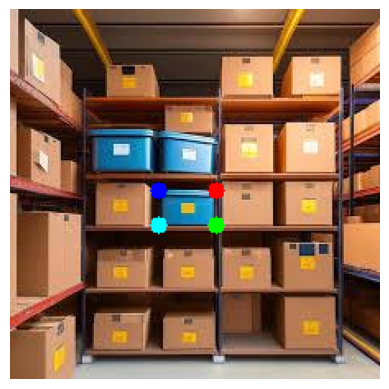

In [93]:
image = cv2.imread(sample_img_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

box_corners_dict = get_box_coordinates(image, model, device, False, False, False)  # it seems like model does not care about the color format , i'm not sure, have to verify???
annotated_frame = get_image_with_box_corners(image, box_corners_dict) # in RGB 

# convert back to BGR
annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR)

print("Image resolution : ", annotated_frame.shape)

# plot numpy array
plot_numpy_array(annotated_frame)

In [80]:
"""
Got this error for random_index : 43 {
	"name": "ValueError",
	"message": "zero-size array to reduction operation minimum which has no identity",
	"stack": "\u001b[1;31m---------------------------------------------------------------------------\u001b[0m\n\u001b[1;31mValueError\u001b[0m                                Traceback (most recent call last)\nCell \u001b[1;32mIn [79], line 4\u001b[0m\n\u001b[0;32m      1\u001b[0m image \u001b[38;5;241m=\u001b[39m cv2\u001b[38;5;241m.\u001b[39mimread(sample_img_path)\n\u001b[0;32m      2\u001b[0m \u001b[38;5;66;03m# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\u001b[39;00m\n\u001b[1;32m----> 4\u001b[0m box_corners_dict \u001b[38;5;241m=\u001b[39m get_box_coordinates(image, model, device, \u001b[38;5;28;01mFalse\u001b[39;00m, \u001b[38;5;28;01mFalse\u001b[39;00m, \u001b[38;5;28;01mFalse\u001b[39;00m)  \u001b[38;5;66;03m# it seems like model does not care about the color format , i'm not sure, have to verify???\u001b[39;00m\n\u001b[0;32m      5\u001b[0m annotated_frame \u001b[38;5;241m=\u001b[39m get_image_with_box_corners(image, box_corners_dict) \u001b[38;5;66;03m# in RGB \u001b[39;00m\n\u001b[0;32m      7\u001b[0m \u001b[38;5;66;03m# convert back to BGR\u001b[39;00m\n\nCell \u001b[1;32mIn [54], line 231\u001b[0m, in \u001b[0;36mget_box_coordinates\u001b[1;34m(img, model, device, showOriginalImage, showPoints, showPlotMaskWithHighestScore)\u001b[0m\n\u001b[0;32m    228\u001b[0m     plot_square(img_mask)\n\u001b[0;32m    230\u001b[0m \u001b[38;5;66;03m# get the rectangular boxes\u001b[39;00m\n\u001b[1;32m--> 231\u001b[0m bounding_box_coords_dict \u001b[38;5;241m=\u001b[39m \u001b[43mget_bounding_box_coordinates\u001b[49m\u001b[43m(\u001b[49m\u001b[43mimg_mask\u001b[49m\u001b[43m)\u001b[49m\n\u001b[0;32m    233\u001b[0m \u001b[38;5;66;03m# get the coordinates of the rectangular bounding box\u001b[39;00m\n\u001b[0;32m    234\u001b[0m \u001b[38;5;28;01mreturn\u001b[39;00m bounding_box_coords_dict\n\nCell \u001b[1;32mIn [54], line 35\u001b[0m, in \u001b[0;36mget_bounding_box_coordinates\u001b[1;34m(mask)\u001b[0m\n\u001b[0;32m     32\u001b[0m true_indices \u001b[38;5;241m=\u001b[39m np\u001b[38;5;241m.\u001b[39margwhere(mask)\n\u001b[0;32m     34\u001b[0m \u001b[38;5;66;03m# Get the bounding box of the True region\u001b[39;00m\n\u001b[1;32m---> 35\u001b[0m top_left \u001b[38;5;241m=\u001b[39m \u001b[38;5;28mtuple\u001b[39m(\u001b[43mnp\u001b[49m\u001b[38;5;241;43m.\u001b[39;49m\u001b[43mmin\u001b[49m\u001b[43m(\u001b[49m\u001b[43mtrue_indices\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43maxis\u001b[49m\u001b[38;5;241;43m=\u001b[39;49m\u001b[38;5;241;43m0\u001b[39;49m\u001b[43m)\u001b[49m)\n\u001b[0;32m     36\u001b[0m bottom_right \u001b[38;5;241m=\u001b[39m \u001b[38;5;28mtuple\u001b[39m(np\u001b[38;5;241m.\u001b[39mmax(true_indices, axis\u001b[38;5;241m=\u001b[39m\u001b[38;5;241m0\u001b[39m))\n\u001b[0;32m     38\u001b[0m \u001b[38;5;66;03m# Remove the channels layer coordinate \u001b[39;00m\n\nFile \u001b[1;32m<__array_function__ internals>:200\u001b[0m, in \u001b[0;36mamin\u001b[1;34m(*args, **kwargs)\u001b[0m\n\nFile \u001b[1;32md:\\Users\\Sasika\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\numpy\\core\\fromnumeric.py:2946\u001b[0m, in \u001b[0;36mamin\u001b[1;34m(a, axis, out, keepdims, initial, where)\u001b[0m\n\u001b[0;32m   2829\u001b[0m \u001b[38;5;129m@array_function_dispatch\u001b[39m(_amin_dispatcher)\n\u001b[0;32m   2830\u001b[0m \u001b[38;5;28;01mdef\u001b[39;00m \u001b[38;5;21mamin\u001b[39m(a, axis\u001b[38;5;241m=\u001b[39m\u001b[38;5;28;01mNone\u001b[39;00m, out\u001b[38;5;241m=\u001b[39m\u001b[38;5;28;01mNone\u001b[39;00m, keepdims\u001b[38;5;241m=\u001b[39mnp\u001b[38;5;241m.\u001b[39m_NoValue, initial\u001b[38;5;241m=\u001b[39mnp\u001b[38;5;241m.\u001b[39m_NoValue,\n\u001b[0;32m   2831\u001b[0m          where\u001b[38;5;241m=\u001b[39mnp\u001b[38;5;241m.\u001b[39m_NoValue):\n\u001b[0;32m   2832\u001b[0m     \u001b[38;5;124;03m\"\"\"\u001b[39;00m\n\u001b[0;32m   2833\u001b[0m \u001b[38;5;124;03m    Return the minimum of an array or minimum along an axis.\u001b[39;00m\n\u001b[0;32m   2834\u001b[0m \n\u001b[1;32m   (...)\u001b[0m\n\u001b[0;32m   2944\u001b[0m \u001b[38;5;124;03m    6\u001b[39;00m\n\u001b[0;32m   2945\u001b[0m \u001b[38;5;124;03m    \"\"\"\u001b[39;00m\n\u001b[1;32m-> 2946\u001b[0m     \u001b[38;5;28;01mreturn\u001b[39;00m \u001b[43m_wrapreduction\u001b[49m\u001b[43m(\u001b[49m\u001b[43ma\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mnp\u001b[49m\u001b[38;5;241;43m.\u001b[39;49m\u001b[43mminimum\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;124;43m'\u001b[39;49m\u001b[38;5;124;43mmin\u001b[39;49m\u001b[38;5;124;43m'\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43maxis\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mout\u001b[49m\u001b[43m,\u001b[49m\n\u001b[0;32m   2947\u001b[0m \u001b[43m                          \u001b[49m\u001b[43mkeepdims\u001b[49m\u001b[38;5;241;43m=\u001b[39;49m\u001b[43mkeepdims\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43minitial\u001b[49m\u001b[38;5;241;43m=\u001b[39;49m\u001b[43minitial\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mwhere\u001b[49m\u001b[38;5;241;43m=\u001b[39;49m\u001b[43mwhere\u001b[49m\u001b[43m)\u001b[49m\n\nFile \u001b[1;32md:\\Users\\Sasika\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\numpy\\core\\fromnumeric.py:86\u001b[0m, in \u001b[0;36m_wrapreduction\u001b[1;34m(obj, ufunc, method, axis, dtype, out, **kwargs)\u001b[0m\n\u001b[0;32m     83\u001b[0m         \u001b[38;5;28;01melse\u001b[39;00m:\n\u001b[0;32m     84\u001b[0m             \u001b[38;5;28;01mreturn\u001b[39;00m reduction(axis\u001b[38;5;241m=\u001b[39maxis, out\u001b[38;5;241m=\u001b[39mout, \u001b[38;5;241m*\u001b[39m\u001b[38;5;241m*\u001b[39mpasskwargs)\n\u001b[1;32m---> 86\u001b[0m \u001b[38;5;28;01mreturn\u001b[39;00m ufunc\u001b[38;5;241m.\u001b[39mreduce(obj, axis, dtype, out, \u001b[38;5;241m*\u001b[39m\u001b[38;5;241m*\u001b[39mpasskwargs)\n\n\u001b[1;31mValueError\u001b[0m: zero-size array to reduction operation minimum which has no identity"
}"""

'\nGot this error for box_42{\n\t"name": "ValueError",\n\t"message": "zero-size array to reduction operation minimum which has no identity",\n\t"stack": "\x1b---------------------------------------------------------------------------\x1b\n\x1bValueError\x1b                                Traceback (most recent call last)\nCell \x1bIn [79], line 4\x1b\n\x1b      1\x1b image \x1b=\x1b cv2\x1b.\x1bimread(sample_img_path)\n\x1b      2\x1b \x1b# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)\x1b\n\x1b----> 4\x1b box_corners_dict \x1b=\x1b get_box_coordinates(image, model, device, \x1bFalse\x1b, \x1bFalse\x1b, \x1bFalse\x1b)  \x1b# it seems like model does not care about the color format , i\'m not sure, have to verify???\x1b\n\x1b      5\x1b annotated_frame \x1b=\x1b get_image_with_box_corners(image, box_corners_dict) \x1b# in RGB \x1b\n\x1b      7\x1b \x1b# convert back to BGR\x1b\n\nCell \x1bIn [54], line 231\x1b, in \x1bget_box_coordinates\x1b(img, model, device, showOriginalImage, showP